# 2. Обзор типов визуализации

Начнём с терминологии.

Система координат — это способ определения положения точки в пространстве или на плоскости. Самая простая система координат — двумерная прямоугольная,  
или декартова, система координат, с которой вы знакомы из уроков математики в школе. Каждой точке в этой системе соответствуют два значения: значение  
по оси абсцисс и значение по оси ординат.

Ось абсцисс — горизонтальная ось в прямоугольной системе координат. Традиционно её называют осью X.

Ось ординат — вертикальная ось в прямоугольной системе координат. Традиционно её называют осью Y.

Своё название прямоугольная система координат получила за то, что её оси перпендикулярны друг другу, т. е. находятся под прямым углом.

<img src="data/dst3-u1-md13_2_1.png" width=800 height=600>

→ Большинство графиков, которые мы будем рассматривать, будут построены именно в прямоугольной системе координат.

Наука о данных насчитывает в своём арсенале десятки различных типов визуализации для анализа, однако запоминать их все не имеет смысла,  
так как большинство из них специфичны для разного рода задач и их с лёгкостью можно найти в документации.

→ Мы с вами познакомимся с основными и самыми популярными видами графиков и диаграмм, а также с областями их применения и в дальнейшем  
научимся строить их с помощью Python.

### Основные типы визуализации:

* линейный график;  
* гистограмма;  
* диаграмма рассеяния;  
* коробчатая диаграмма;  
* круговая диаграмма;  
* столбчатая диаграмма;  
* тепловая карта.

Для каждого типа визуализации, который мы будем рассматривать далее, приведён пример на реальных датасетах, сам источник данных и выводы,  
которые можно сделать, исходя из графика.

Также к каждому графику прилагается код для его построения, который вы сможете разобрать сами, после того как изучите материал модуля.  
Так вы сможете понять, остались ли у вас пробелы, и, если построение какого-то из графиков всё-таки вызовет у вас затруднение, сразу вернуться  
и закрепить материал.

## Линейный график (lineplot)

Это самый простой тип графика. Вы, несомненно, рисовали такие на уроках математики в школе.

Линейный график представляет собой последовательность точек, соединённых линией. Каждая точка — это пара координат x и y, которые отображены по осям  
абсцисс и ординат (в двумерном случае). 

На практике, в Data Science такие графики чаще всего используются для визуализации временных рядов, например чтобы отследить динамику продаж во времени,  
число активных пользователей по дням, изменение курса валют и акций.

График бывает особенно полезен, когда вы пытаетесь спрогнозировать ряд и вам необходимо увидеть свой прогноз на графике и сравнить его с действительностью.

Несмотря на свою простоту, при правильном применении линейный график может быть очень информативным и полезным: он позволяет выявить тенденцию движения показателя  
и найти ключевые точки его роста или падения.

#### Пример:

Ниже представлен график динамики продаж видеоигр в зависимости от региона. По оси ординат отложено число проданных дисков с видеоиграми (в миллионах) в  
различных регионах (NA — Северная Америка, EU — Европа, JP — Япония, Other — другие регионы, Global — во всём мире), по оси абсцисс — год выпуска игры.

<img src="data/dst3-u1-md13_2_2.png" width=800 height=600>

Из графика отчётливо виден рост числа продаж видеоигр по всем рынкам примерно до 2007 года, после чего наблюдается резкий спад и неизбежное приближение числа  
продаж к 0 в 2020 году. Вполне объяснимое явление: именно в этот период наступает эра интернет-магазинов видеоигр и люди постепенно уходят от дисковых накопителей.

На графике можно отследить лидеров продаж, то, как они менялись, какие страны влияют на общие продажи, где абсолютный и относительный прирост продаж в динамике выше,  
а где — ниже.

Text(0, 0.5, 'Суммарный объём продаж')

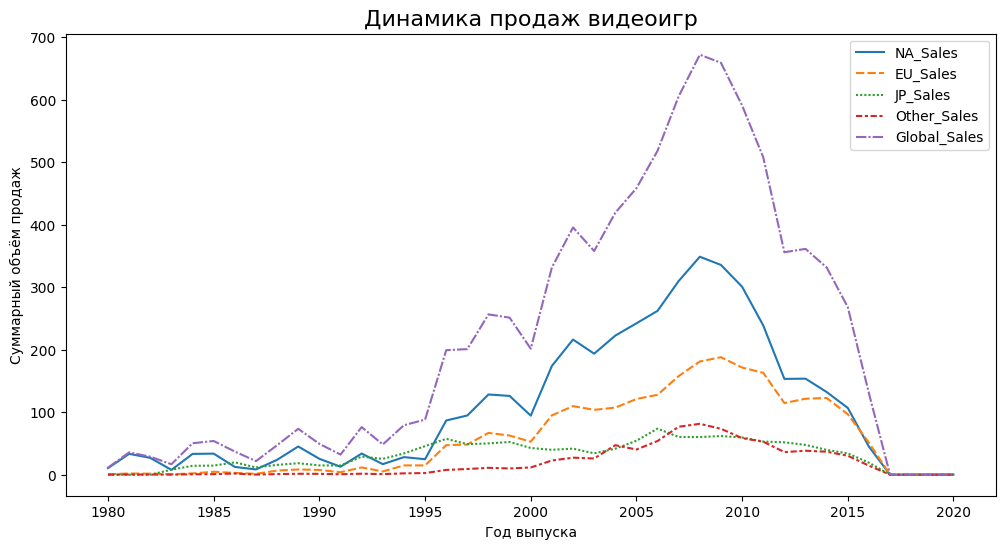

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

vg_data = pd.read_csv('data/vgsales.csv')
dinamic_by_region = vg_data[
        ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year_of_Release']
    ].groupby('Year_of_Release').sum()

fig = plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=dinamic_by_region)
lineplot.set_title('Динамика продаж видеоигр', fontsize=16)
lineplot.set_xlabel('Год выпуска')
lineplot.set_ylabel('Суммарный объём продаж')

## Гистограмма (histogram)

Гистограмма — это способ визуализации частоты попадания признака в некоторый численный интервал. Гистограмма состоит из прямоугольников, расположенных вдоль оси x.

Ось разбита на интервалы, их ещё называют корзинами (bins), их число задаётся пользователем. Ширина интервалов одинакова и задаёт ширину прямоугольника.

По оси y откладывается высота прямоугольника — количество наблюдений, которые попали в интервал. Чем выше столбик, тем больше наблюдений находятся в интервале.

Гистограммы часто используются для оценки распределения числового признака, например мы можем понять, как распределены цены на товары, число шагов, которые делает  
пользователь умных часов, масса метеоритов, падающих на землю.

#### Пример:

Ниже приведено два вида гистограмм с общей осью.

Верхняя гистограмма описывает общее распределение стоимости недвижимости в Мельбурне. Весь диапазон цен разбит на 30 равных интервалов. На каждом  
интервале строится прямоугольник, его высота — число объектов, стоимость которых лежит в этом интервале.

Нижняя гистограмма описывает то же распределение, но с учётом типов недвижимости. Здесь число объектов, попавших в корзину, обозначается интенсивностью цвета:  
чем темнее полоса, тем больше в данных объектов с ценой из этого интервала.

<img src="data/dst3-u1-md13_2_3.png" width=800 height=600>

Во-первых, основная часть цен на объекты сосредоточена в интервале от  0.1 до 2 млн, и наибольшее число цен лежит в интервале от 0.9 до 1.2 млн (самый высокий  
прямоугольник). Далее при повышении цены количество объектов только падает, что вполне соответствует жизненным реалиям — дорогих и роскошных домов гораздо  
меньше, чем домов среднего ценового сегмента. Забегая вперёд, в тему теории вероятности, скажем, что данная гистограмма очень напоминает логарифмическое  
нормальное распределение. Такой вид распределения очень распространён на практике.

Во-вторых, как видно из нижней гистограммы, объекты типа house (h) имеют схожее с общим распределение — их максимальная частота также наблюдается в третьем  
интервале, после чего идёт постепенное падение частоты (бледные полосы на высоких значениях цен). Цены на объекты типов unit (u) не превышают 4 млн, и их  
максимум наблюдается во втором интервале.  
Таунхаусы (t) имеют почти одинаковую частоту в каждом ценовом сегменте.

Text(0, 0.5, 'Тип объекта')

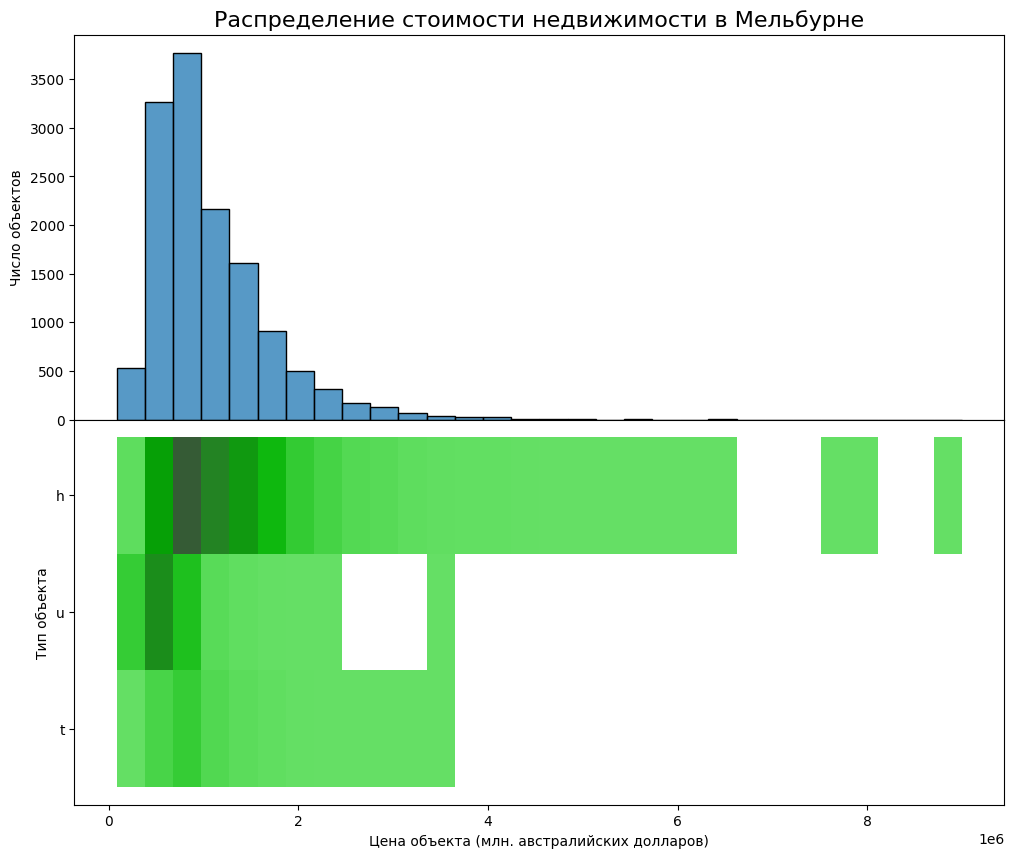

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

melb_data = pd.read_csv('data/melb_data.csv')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=melb_data, 
    x='Price', 
    bins=30,
    ax=axes[0],
)
histplot1.set_title('Распределение стоимости недвижимости в Мельбурне', fontsize=16)
histplot1.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot1.set_ylabel('Число объектов')

histplot2 = sns.histplot(
    data=melb_data,
    x='Price',
    y='Type',
    bins=30,
    color='green',
    ax=axes[1]
)
histplot2.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot2.set_ylabel('Тип объекта')

## Диаграмма рассеяния (scatterplot)

Другое название этого графика — точечная диаграмма.

График представляет собой облака точек: по оси абсцисс откладывается одна числовая переменная, по оси ординат — вторая, а каждая точка на графике —  
это запись из таблицы.

Диаграммы рассеяния являются стандартным средством визуализации связи между двумя числовыми переменными. Однако через настройки графика в исследование  
зависимости можно добавить и несколько категориальных переменных.

Диаграммы рассеяния являются мощным инструментом, который очень широко используется в Data Science. С их помощью мы можем увидеть, как зависит (или не зависит)  
давление от возраста пациента, объём продаж товаров от количества показанной рекламы и т. д.

Оценив взаимосвязь признаков, мы можем принять решение об использовании какого-то из признаков для предсказания.

#### Пример:

Окунёмся немного в орнитологию. На диаграмме рассеяния ниже показана зависимость длины крыльев пингвинов от длины их клюва в миллиметрах. При этом цвет точки на  
графике зависит от вида пингвина, а размер точки — от пола птицы. Итого на одном графике уместилась зависимость сразу между четырьмя признаками! И это ещё не предел.

<img src="data/dst3-u1-md13_2_4.png" width=800 height=600>

Из диаграммы рассеяния отчётливо видна прямая связь параметров тела пингвина: чем больше длина клюва, тем больше длина крыльев. Причём облака точек разного цвета  
плотно сгруппированы относительно своих центров, и, основываясь на длине клюва и крыльев и на половой принадлежности птицы, можно достаточно хорошо предсказать вид  
пингвина. К тому же ярко виден половой диморфизм: длина клюва и крыльев у самцов несколько больше, чем у самок.

Примечание. Стоит отметить, что во всех реализациях диаграммы рассеяния в Python, помимо цвета и размера маркера, можно также выбирать его форму  
(крестообразную/квадратную и т. д.).

Text(0, 0.5, 'Длина крыльев')

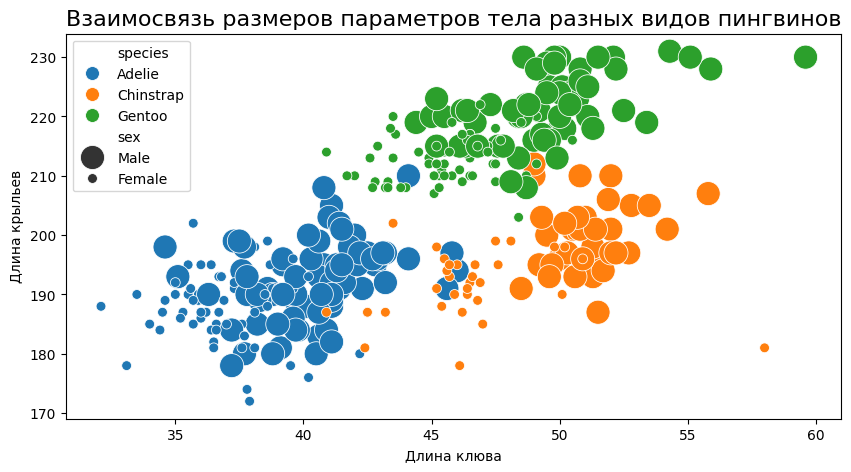

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

penguins_df = sns.load_dataset("penguins")

fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=penguins_df,
    x='bill_length_mm',
    y='flipper_length_mm',
    hue='species',
    s=100,
    size='sex',
    sizes=(50, 300)

)
scatterplot.set_title('Взаимосвязь размеров параметров тела разных видов пингвинов', fontsize=16)
scatterplot.set_xlabel('Длина клюва')
scatterplot.set_ylabel('Длина крыльев')

## Круговая диаграмма (pie chart)

Синонимичные названия диаграммы — пироговая диаграмма и секторная диаграмма.

Круговая диаграмма представляет собой круг, разделённый на секторы. Весь круг составляет 100 %. Каждый из секторов отображает долю одной из категорий  
в данных, размер сектора соответствует части целого от круга.

Диаграмма является способом визуализации для категориального признака: например, можно визуализировать и сравнивать доли от выручки, которые делает  
каждый продавец. 

Круговые диаграммы наглядны, когда нужно показать, как делится на части что-либо целое: например, так можно визуализировать вклад каждого из продавцов в  
выручку магазина. Однако круговые диаграммы неудобны, когда рассматривается больше одного признака — в этом случае приходится добавлять отдельную диаграмму.  
Из-за большей информативности столбчатых диаграмм специалисты склонны выбирать именно их.

#### Пример:

Перед вами диаграмма количества погибших главных и второстепенных персонажей в сериале «Игра престолов» в зависимости от их верности какому-либо из домов.  
На диаграмме изображены названия семи домов (None — персонаж не принадлежал к определённому дому), а внутри секторов указано количество погибших персонажей  
в процентах.

<img src="data/dst3-u1-md13_2_7.png" width=800 height=600>

Из представленной диаграммы видно, что большинство погибших в сериале персонажей не принадлежали ни к одному из домов. На популярный вопрос «Кого чаще убивают,  
верных Старкам или Ланнистерам?» однозначного ответа нет, группы приблизительно одинаковы.

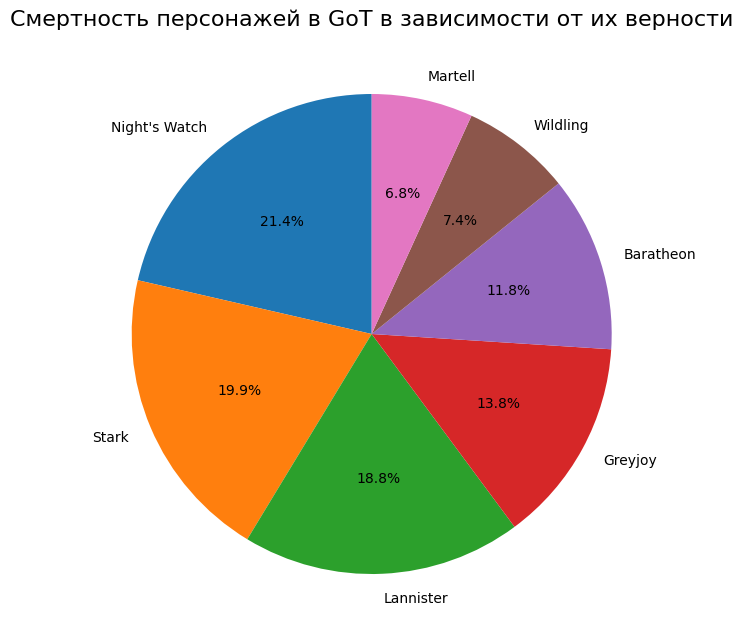

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

game_of_thrones_df = pd.read_csv('data/character-deaths.csv')
game_of_thrones_df['Allegiances'] = game_of_thrones_df['Allegiances'].str.replace('House ', '')
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))
deaths_count = game_of_thrones_df['Allegiances'].value_counts().sort_values(ascending=False).head(7)
pie = ax.pie(
    deaths_count,
    labels=deaths_count.index,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Смертность персонажей в GoT в зависимости от их верности', fontsize=16)
plt.show(pie)

## Столбчатая диаграмма (bar chart)

Столбчатая диаграмма также максимально проста: по оси x откладывается некоторый категориальный признак, для каждой категории которого рассчитан  
некоторый показатель (средняя цена товаров, медианная стоимость нефти, максимальная зафиксированная концентрация газа). Высота столбца и есть значение  
этого показателя. 

Основное применение столбчатых диаграмм в Data Science — сравнение категорий друг с другом. Например, сравнение ресторанов по суммарной прибыли, сравнение  
средних расходов пользователей, сравнение медианной стоимости квартир по районам и т. д.

Преимущество столбчатых диаграмм над круговыми в том, что в столбчатые диаграммы можно добавлять разделение по другим категориальным признакам и рассматривать  
совместное распределение показателей, тем самым повышая информативность. Такие диаграммы называются многоуровневыми.

#### Пример:

В качестве примера приведём две диаграммы стоимости женского нижнего белья на сайте Amazon.

На левой диаграмме изображены средние цены товаров для каждого бренда. На правой диаграмме изображены те же цены, но с разделением цветом по категориям  
товаров (Bras — бюстгальтеры, Panties — трусы). Правая диаграмма является многоуровневой столбчатой диаграммой.

<img src="data/dst3-u1-md13_2_8.png" width=800 height=600>

Из левой диаграммы видно, что наибольшую среднюю цену имеют товары бренда Compression-Comfort, а наименьшую — Lucky-Brand.

Из правого графика можно заметить, что средняя цена трусов всегда ниже средней цены бюстгальтеров.

Кроме того, для некоторых брендов в данных есть информация только о бюстгальтерах или только о трусах (их столбцы окрашены только синим или только  
оранжевым цветом).

C:\Users\user\AppData\Local\Temp\ipykernel_16576\192481839.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot1 = sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_16576\192481839.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot2 = sns.barplot(


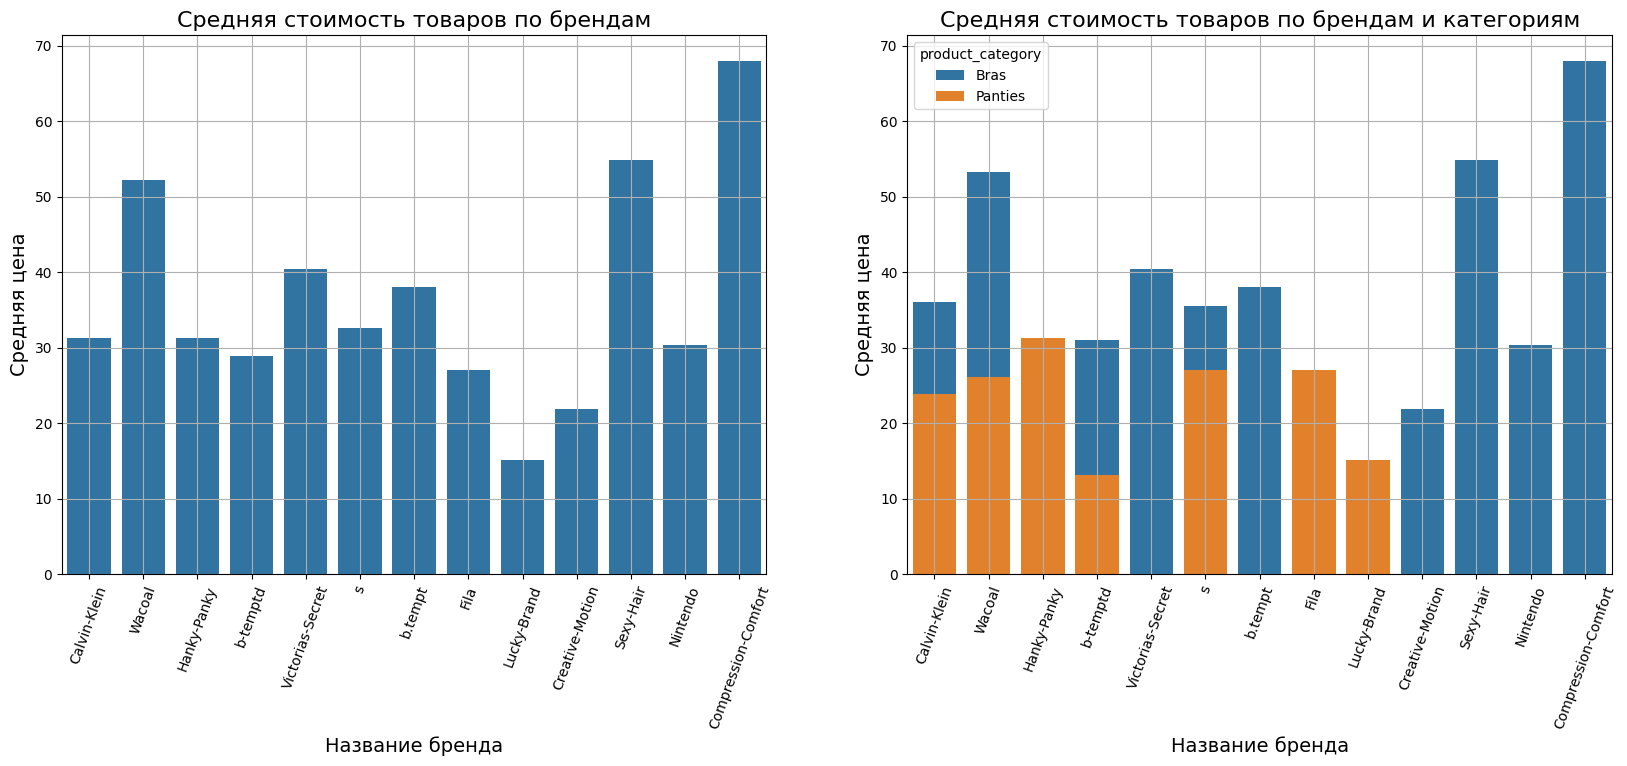

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

amazon_data = pd.read_csv('data/amazon_com.csv')

def replace_url(brand_name):
    if 'ref=' in brand_name:
        if 'Calvin' in brand_name:
            return 'Calvin-Klein'
        elif 'Wacoal' in brand_name:
            return 'Wacoal'
        else:
            return 'b.tempt'
    else:
        return brand_name
    
amazon_data['brand_name'] = amazon_data['brand_name'].apply(replace_url)
amazon_data['price'] = amazon_data['price'].str.replace('$', '').astype('float64')
amazon_data['brand_name'].unique()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
barplot1 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    orient='v',
    ax = axes[0],
    ci=None
)
barplot1.tick_params(axis='x', rotation=70);
barplot1.set_title('Средняя стоимость товаров по брендам', fontsize=16);
barplot1.set_xlabel('Название бренда', fontsize=14);
barplot1.set_ylabel('Средняя цена', fontsize=14);
barplot1.grid()

barplot2 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    hue='product_category',
    orient='v',
    ax = axes[1],
    ci=None,
    dodge=False
)
barplot2.tick_params(axis='x', rotation=70);
barplot2.set_title('Средняя стоимость товаров по брендам и категориям', fontsize=16);
barplot2.set_xlabel('Название бренда', fontsize=14);
barplot2.set_ylabel('Средняя цена', fontsize=14);
barplot2.grid()

| Признак |	Гистограмма	| Столбчатая диаграмма |  
| --- | --- | --- |
| Что показывают?	| Распределение числового признака (как часто значения признака попадают в каждый из выделенных интервалов) |	Сравнение категорий признака по заданному показателю |  
| Число столбцов |	Задаётся пользователем	| Равно числу категорий |  
| Размещение столбцов	| Непрерывно	| Дискретно |  
| Пример применения	| Распределение размера заработной платы в России (до 20 тысяч, от 21 до 40 тысяч, от 41 до 60 тысяч…)	| Средняя заработная плата по отраслям экономики, субъектам РФ, полу и прочее |

## Тепловая карта (heatmap)

Тепловая карта — это графическое представление некоторой таблицы, где значения в ячейках выделяются определённым цветом или интенсивностью цвета.  
Таблицей может быть как DataFrame, так и, например, изображение.

Способы применения тепловых карт разнообразны: от визуализации категорий объектов на изображениях до графического представления матриц.

При исследовании табличных данных тепловые карты чаще всего применяются для визуализации сводных таблиц.

#### Пример:

Ниже представлена тепловая карта ежедневной активности в Twitter Дональда Трампа и Джо Байдена перед американскими президентскими выборами в 2020 году.

На оси абсцисс отложены минуты, а на оси ординат — часы. Квадраты тепловых карт окрашены в соответствии с тем, сколько твитов было выложено кандидатами  
в каждую часовую/минутную ячейку за указанный период. Сбоку находится легенда, которая показывает соотношения цвета и количества твитов.

<img src="data/dst3-u1-md13_2_10.png" width=800 height=600>

Тёмная полоса, соответствующая первой половине дня, говорит о том, что оба кандидата не заходят в Twitter по утрам.

У Дональда Трампа тепловая карта намного ярче, чем у Джо Байдена, что говорит о том, что Трамп выкладывает твиты намного чаще.

Кроме того, можно сказать, что Байден предпочитает посещать соцсети в конце дня — основная масса его твитов сделана после семи часов вечера.

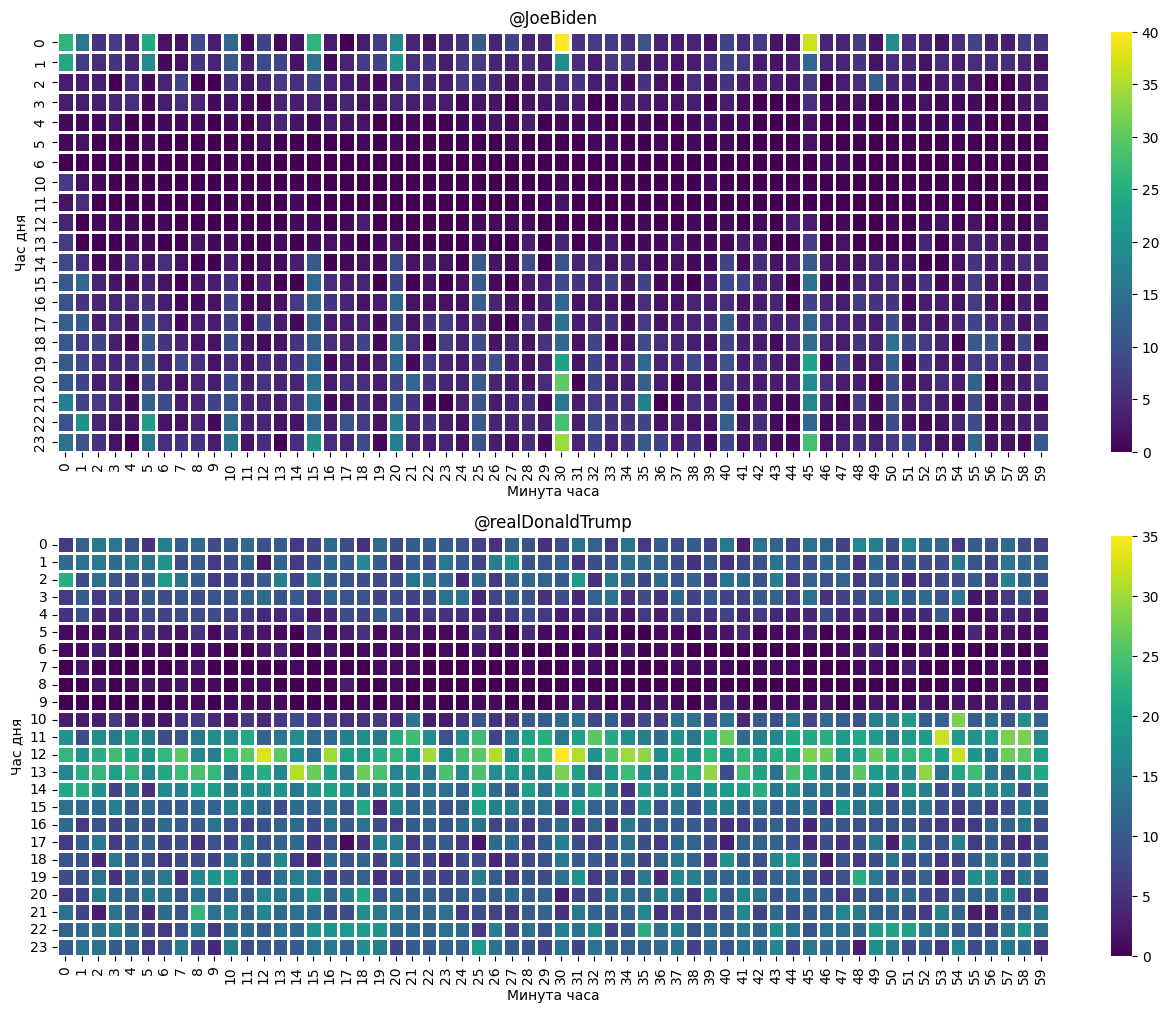

In [6]:
tweets_df = pd.read_csv("data/biden_trump_tweets.csv", 
                 parse_dates=['date_utc'], 
                 dtype={'hour_utc':int,'minute_utc':int,'id':str}
                )
g = tweets_df.groupby(['hour_utc','minute_utc','username'])
tweet_cnt = g.id.nunique()
jb_tweet_cnt = tweet_cnt.loc[:,:,'JoeBiden'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
dt_tweet_cnt = tweet_cnt.loc[:,:,'realDonaldTrump'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
jb_heatmap = sns.heatmap(
    jb_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[0]
)
jb_heatmap.set_title('@JoeBiden');
jb_heatmap.set_xlabel('Минута часа');
jb_heatmap.set_ylabel('Час дня');

dt_heatmap = sns.heatmap(
    dt_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[1]
)

dt_heatmap.set_title('@realDonaldTrump');
dt_heatmap.set_xlabel('Минута часа');
dt_heatmap.set_ylabel('Час дня');

## Коробчатая диаграмма (boxplot, box and whisker plot)

Синонимичные названия диаграммы — ящик с усами и диаграмма размаха.

Коробчатые диаграммы, которые были введены в употребление Джоном Тьюки в 1977 году, являются новым типом диаграмм для исследования распределения числового  
признака по отношению к предыдущим. Диаграмма основана на понятии квантилей.

Приведём общую схему построения диаграммы:

<img src="data/dst3-u1-md13_2_5.png">

Для построения коробчатой диаграммы надо знать три характеристики:

 * 25 % квантиль;
 * 50 % квантиль, или медиана;
 * 75 % квантиль.

 Коробчатые диаграммы часто используются для поиска потенциальных выбросов в данных, а также для сравнения показателей нескольких распределений друг с другом:  
 например, можно визуально сравнить медианные стоимости товаров разных магазинов или размах цен на квартиры в районах Москвы (размеры ящиков).

Коробчатые диаграммы часто являются более совершенными аналогами гистограмм.

#### Пример:

Коробчатая диаграмма ниже иллюстрирует зависимость возраста пользователей компании CitiBike от типа пользователя (Customer — клиент с подпиской на 24 часа или  
на три дня, Subscriber — подписчик с годовой арендой велосипеда).

<img src="data/dst3-u1-md13_2_6.png">

Для обеих групп пользователей приложения длина ящика с усами примерно одинакова: от 16 до 75 лет (левая и правая граница). Причём медианный возраст подписчиков с  
годовой арендой составляет 35 лет, а медианный возраст для клиентов с подпиской на 24 часа одинаков с 75 % квантилью и равен 49 годам (линия внутри ящика совпадает  
с правой линией его границы).

Ещё один интересный факт: число потенциальных выбросов по возрасту среди группы Subscriber значительно больше, чем в группе Customer. Можно предположить,  
что пользователи с возрастом 100+ — это люди, которые намеренно или ошибочно указали неверный возраст, и среди подписчиков их больше. Этот факт нуждается  
в дальнейшем исследовании.

Text(0, 0.5, 'Тип пользователя')

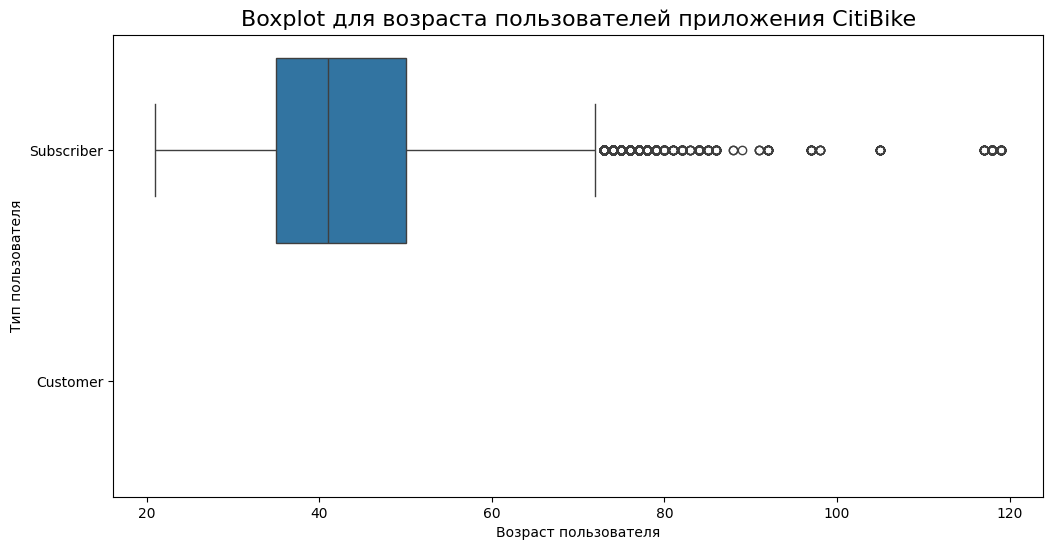

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

citibike_df = pd.read_csv('data/citibike-tripdata.csv')
citibike_df['age'] = 2018 - citibike_df['birth year']

fig = plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(data=citibike_df, x='age', y='usertype')
boxplot.set_title('Boxplot для возраста пользователей приложения CitiBike', fontsize=16)
boxplot.set_xlabel('Возраст пользователя')
boxplot.set_ylabel('Тип пользователя')

# 3. Знакомимся с новыми данными: коронавирус

Мы будем изучать методы визуализации, используя два набора данных:

1. covid_data — данные о показателях заболеваемости за каждый день в различных регионах 187 стран.

Мы будем работать со следующими столбцами:  
* date — дата наблюдения;
* province/state — наименование провинции/штата;
* country — наименование страны;
* confirmed — общее число зафиксированных случаев на указанный день;
* deaths — общее число зафиксированных смертей на указанный день;
* recovered — общее число выздоровлений на указанный день.

2. country_vaccinations — данные о процессе вакцинирования людей в 221 стране мира.

Данная таблица содержит следующие столбцы:  
* country — наименование страны;
* date — дата наблюдения;
* total_vaccinations — общее число введённых вакцин в стране на указанный день;
* people_vaccinated — общее число привитых первым компонентом в стране на указанный день;
* people_vaccinated_per_hundred — процент привитых первым компонентом в стране на указанный день (рассчитывается как );
* people_fully_vaccinated — общее число привитых вторым компонентом в стране на указанный день (первый компонент уже был введён им ранее);
* people_fully_vaccinated_per_hundred — процент привитых вторым компонентом в стране на указанный день (рассчитывается как );
* daily_vaccination — ежедневная вакцинация (число вакцинированных в указанный день);
* vaccines — комбинации вакцин, используемые в стране.

In [8]:
covid_data = pd.read_csv('data/covid_data.csv')
display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


In [9]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
display(vaccinations_data.head())

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


## Немного об особенностях данных

В таблице covid_data данные о заболеваемости представлены для каждого региона (штата) страны за каждый день. Например, для США (United States) записи  
за 29 мая 2021 года имеют вид:

<img src="data/dst3-u1-md13_3_4.png">

В таблице vaccinations_data параметры вакцинирования отображены для всех стран на каждый день, без учёта регионов. Вот часть таблицы для тех же Соединённых  
Штатов за 29 мая 2021 года. Как видите, она всего одна:

<img src="data/dst3-u1-md13_3_5.png" width=1200>

В данных много пропусков, а также неверно введённых значений. Например, для США (United States) и Великобритании (United Kingdom) в большинстве записей  
таблицы covid_data число выздоровевших людей равно 0. В данном модуле мы закроем на это глаза, но вообще эти страны подлежали бы исключению из данных или  
нам понадобился бы дополнительный источник данных, из которого мы смогли бы получить недостающую информацию.

Обратите внимание, что признаки confirmed, deaths, recovered, total_vaccination, people_vaccinated, people_fully_vaccinated — это суммарные показатели по стране,  
то есть с каждым днём они должны расти. Такие признаки называют накопительными.

Возникает большое желание объединить таблицы. Для этого необходимо учитывать следующие нюансы:

1. В таблице covid_data необходимо предварительно рассчитать суммарное ежедневное число заболевших во всех провинциях/штатах в каждой стране.

2. В таблицах не совпадает число стран, а иногда и их названия. 

При объединении таблиц по столбцу мы определённо теряем данные (в данной задаче потери незначительны). Избежать этого можно ручными преобразованиями данных — искать различия в названиях стран в таблицах и преобразовывать их. Однако это не является темой данного модуля.

3. Таблицы имеют разные периоды наблюдений (вакцины появились позже, чем сам вирус). Объединив данные с типом inner, мы можем потерять большое количество наблюдений в таблице covid_data.

## Предобработка данных

Опираясь на замечания выше, выполним небольшую предобработку.

В таблице covid_data:

1. Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам. Тем самым переходим от данных по регионам к данным по странам:

In [10]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

2. Преобразуем даты в формат datetime с помощью функции pd.to_datetime():

In [11]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

3. Создадим признак больных на данный момент (active). Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:

In [12]:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

4. Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей. Для этого отсортируем данные по названиям стран, а затем по датам.  
После этого произведём группировку по странам и рассчитаем разницу между «вчера и сегодня» с помощью метода diff():

In [13]:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

Итоговый вид таблицы covid_data:

<img src="data/dst3-u1-md13_3_6.png" width=1000>

В таблице vaccinations_data достаточно будет преобразовать столбцы в формат datetime:

In [14]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

За какой период представлены данные в таблице covid_data? В качестве ответа введите даты в формате datetime (без указания времени).

In [15]:
print(f"Данные о заболеваемости предоставлены от {covid_data['date'].min()} до  {covid_data['date'].max()}")

Данные о заболеваемости предоставлены от 2020-01-22 00:00:00 до  2021-05-29 00:00:00


За какой период представлены данные в таблице vaccinations_data? В качестве ответа введите даты в формате datetime без указания времени.

In [16]:
print(f"Данные о вакцинации предоставлены от {vaccinations_data['date'].min()} до  {vaccinations_data['date'].max()}")

Данные о вакцинации предоставлены от 2020-12-02 00:00:00 до  2021-09-06 00:00:00


С помощью метода merge() объедините таблицы covid_data и vaccinations_data по столбцам date и country.
Тип объединения выставьте так, чтобы в результирующую таблицу попали только наблюдения за период, вычисленный в задании 3.1.  
То есть в результирующую таблицу должны попасть все записи из таблицы covid_data и из её пересечения с vaccinations_data, но не более.  
Результат объединения занесите в переменную covid_df.
Сохраните таблицу covid_df — она понадобится нам в следующем юните.

Сколько строк и столбцов в таблице covid_df?

In [17]:
covid_df = covid_data.merge(vaccinations_data, on=['date', 'country'], how='left')
print('Число строк: ', covid_df.shape[0])
print('Число столбцов: ', covid_df.shape[1])

Число строк:  86785
Число столбцов:  16


В получившейся в задании 3.3 таблице covid_df создайте признаки death_rate — общий процент смертей среди зафиксированных случаев (летальность)  
и recover_rate — общий процент случаев выздоровления. Данные характеристики рассчитайте как отношение числа смертей (deaths) и числа выздоровлений  
(recovered) к числу зафиксированных случаев (confirmed) и умножьте результаты на 100%.  
Какова максимальная летальность в США (United States) за весь период? Ответ округлите до второго знака после запятой.

In [18]:
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100
round(covid_df[covid_df['country'] == 'United States']['death_rate'].max(), 2)

np.float64(7.19)

Чему равен средний процент выздоровевших в России (Russia)? Ответ округлите до второго знака после запятой.

In [19]:
round(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean(), 2)
covid_df.to_csv('data/covid_df.csv')

# <center>  4. Графические возможности библиотеки Pandas

✍ Дальнейшая работа будет проводиться с таблицей covid_df — результатом объединения таблиц covid_data и vaccinations_data.

Оказывается, за способами визуализации данных не нужно далеко ходить. Базовую (примитивную) визуализацию можно выполнить с помощью уже знакомой нам библиотеки Pandas.  
Функционал для создания основных типов графиков уже включён в библиотеку. С изучения возможностей Pandas мы и начнём наше погружение в программную визуализацию.

Примечание. Для визуализации Pandas использует библиотеку matplotlib, о которой мы поговорим в следующем юните. Если попробовать воспользоваться методами визуализации  
Pandas без предварительной установки matplotlib, вы получите ошибку ImportError. Для установки библиотеки используется стандартная команда, которую нужно выполнить в  
терминале:


pip install matplotlib


или в ячейке ноутбука:


! pip install matplotlib

## <center> Базовая визуализация в Pandas

Основным методом для создания простейших графиков в Pandas является plot().

#### <center> Основные параметры метода plot()

x — название признака, который будет отложен по оси абсцисс;  
y — название признака, который будет отложен по оси ординат;  
figsize — размер графика (кортеж из ширины и высоты в дюймах);  
kind —тип визуализации. Основные типы:  
'line' — линейный график (по умолчанию);  
'bar' — столбчатая диаграмма;  
'barh' — горизонтальная столбчатая диаграмма;  
'hist' — гистограмма;  
'box' — коробчатая диаграмма (boxplot);  
'pie' — круговая диаграмма;  
'scatter' — диаграмма рассеяния.  
grid — отображение сетки (по умолчанию False);  
legend — отображение легенды (по умолчанию False);  
title — название графика;  
color — цвет.  

Давайте попрактикуемся в использовании метода plot().

Начнём с исследования заболеваемости коронавирусом во всём мире. Для этого первым делом отобразим, как менялось ежедневное число заболевших (daily_confirmed)  
во всём мире во времени. Далее сгруппируем таблицу по датам и подсчитаем суммарное число зафиксированных случаев по дням.

Теперь мы наконец можем построить график с помощью метода plot(). Будем использовать линейный график размером 12x4 (попробуйте взять другие числа, чтобы увидеть разницу).  
Подпишем график и отобразим сетку. Параметр lw (line width) отвечает за ширину линии для линейного графика.

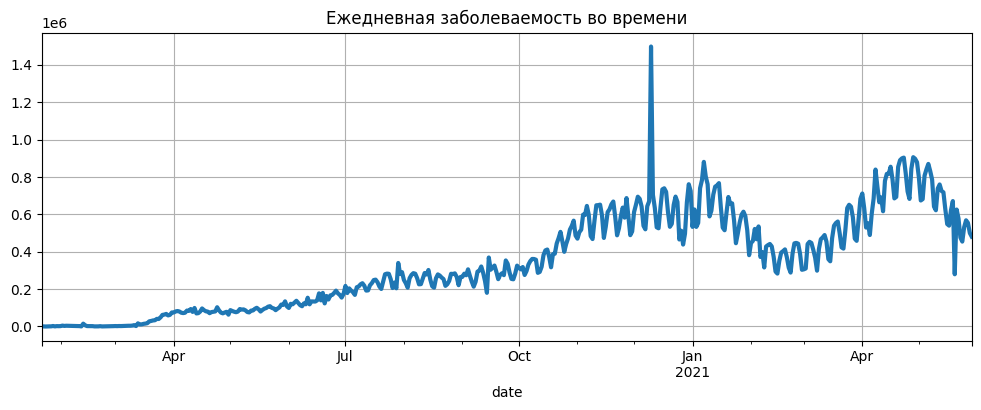

In [20]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
);

Примечание. Обратите внимание, что мы не использовали параметры x и y. Это связано с тем, что в нашем случае переменная grouped_cases — это объект Series.

plot() может являться методом объекта типа DataFrame или Series. При типе DataFrame требуется указать х и у, либо будут построены графики всех столбцов.  
При типе Series в этом нет необходимости, ведь это и так всего один столбец данных (у) с индексами (х).

При этом по оси абсцисс (х) откладываются индексы (на сгруппированных данных grouped_cases индексы — это даты), а по оси ординат (у) — значения показателей.

Здесь и далее в модуле точка с запятой в последней строке кода используется во избежание вывода на экран служебной информации в ноутбуке (попробуйте её убрать  
и посмотрите, что будет).

На графике выше отчётливо виден умеренный начальный рост заболеваемости, после чего наблюдается её резкое повышение в середине октября 2020 года, а в декабре 2020 года —  
аномальная вспышка коронавируса (зафиксировано более 1.4 млн. заболевших в день). Такой резкий максимум, возможно, является ошибкой в данных и требует более детального разбора.  
Далее заметно постепенное уменьшение числа ежедневно фиксируемых случаев и наступление второй волны в марте 2021 года. Наконец, начиная с мая 2021 года наблюдается очередной спад.

Пилообразность графика (подъёмы и спады с периодом в 7 дней) может быть связана с рабочими и выходными днями.

Нам неизвестно, как устроен во времени процесс постановки диагноза и сбора статистики и отличается ли он в разных странах. Можно предположить, что:

* спад в выходные обусловлен меньшей интенсивностью работы медицинских служб;
* в тех случаях, когда диагноз ставится по результатам анализа, если в выходные берётся/проводится меньше тестов, к понедельнику они ещё не готовы и диагноз ещё не поставлен;
* минимум в понедельник может быть запаздыванием подсчёта статистики, т.е. на самом деле данные за понедельник — это данные за воскресенье.

Теперь построим гистограмму, которая покажет распределение ежедневной заболеваемости во всём мире. Для этого параметр kind выставляем на значение 'hist'.  
Параметр bins (корзины) отвечает за число прямоугольников в гистограмме — пусть их будет 10 (попробуйте использовать другие числа, чтобы увидеть разницу).

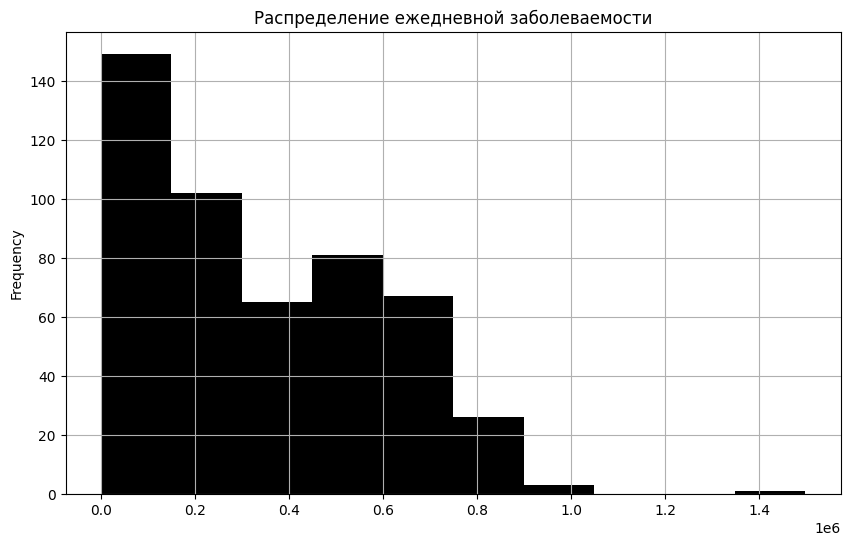

In [21]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10
);

По гистограмме можно судить о частоте попадания ежедневной заболеваемости в определённый интервал. На оси абсцисс отложен диапазон ежедневной заболеваемости (в млн человек),  
разбитый на десять равных интервалов, на оси ординат — число наблюдений, попавших в этот интервал.

Мы видим модальное значение около нуля (от 0 до примерно 150 тыс. заболеваний в день), то есть большинство наблюдений сосредоточено в первом интервале, далее частота постепенно  
падает. Это связано с тем, что долгое время распространение вируса было довольно слабым.
В глаза бросается «пенёк», соответствующий резкой вспышке заболеваемости, которую мы видели ранее. Его высота очень мала, ведь такое наблюдение единственное. Даже на гистограмме  
кажется, что данное наблюдение является аномальным и, скорее всего, представляет собой выброс.

Давайте построим столбчатую диаграмму, которая покажет ТОП-10 стран по суммарной заболеваемости.

Для этого сгруппируем данные по странам и вычислим последний зафиксированный показатель с помощью агрегирующего метода last() — он возвращает последнее значение в  
столбце DataFrame.

Для построения столбчатой диаграммы значение параметра kind выставляем на 'bar'. Параметр colormap отвечает за цветовую гамму графика.

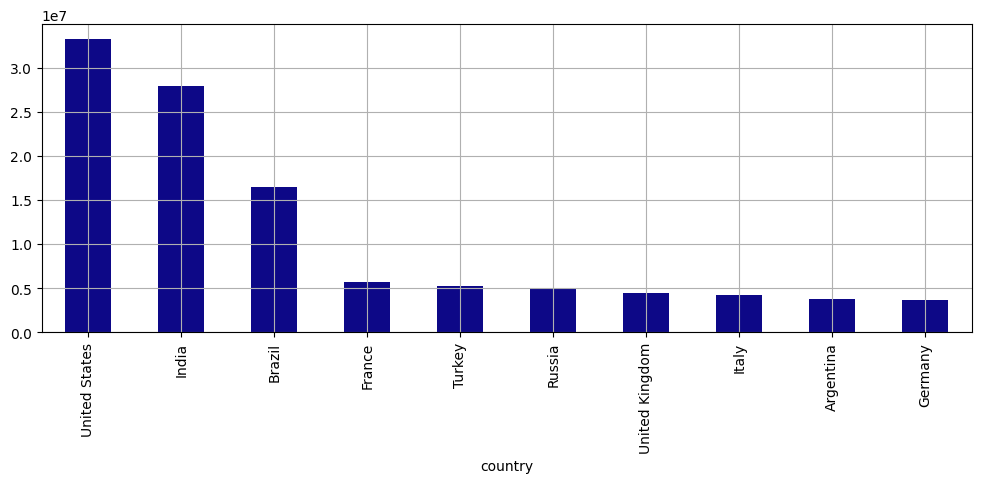

In [22]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

На диаграмме видно, что лидерами по числу заболевших являются Соединённые Штаты, Индия и Бразилия. Соотношение зафиксированных случаев заражения в остальных странах  
примерно одинаковое.

А теперь посмотрим, как в этих десяти странах соотносится количество заболевших и умерших от вируса. Для этого отобразим сразу два показателя на столбчатой диаграмме: 

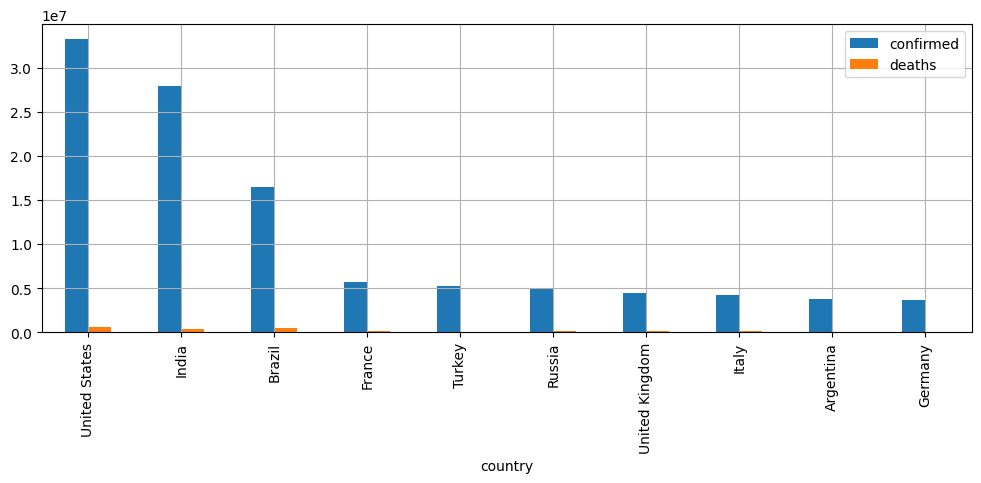

In [23]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(     kind='bar',     grid=True,     figsize=(12, 4), );

Этот график является небольшим усовершенствованием предыдущего. Теперь на нём можно увидеть соотношение зафиксированных случаев заражения и смертей.

Очевидно, что отношение числа умерших к числу заболевших весьма низкое. Также это может косвенно говорить о разных методиках учёта заболевших (например,  
какие-то страны могут учитывать заболевших только по мазку, в то время как другие — по клинической картине, учитывающей и другие показатели). То есть с  
методической точки зрения учёт по числу заражений может быть не совсем корректным. Лучшим показателем будет являться число смертей (хотя и этот метод не идеален).

Более того, если построить график с сортировкой не по числу заболевших, а по числу умерших, поменяются и места, и страны в рейтинге. Попробуйте построить  
такой график сами!

Визуализация с помощью Pandas является удобным инструментом, когда графики необходимо построить «здесь и сейчас», не сильно заботясь об их внешнем виде.  
Однако такой подход имеет значительный минус по сравнению с использованием специализированных библиотек для визуализации — довольно ограниченный функционал:

* С помощью Pandas можно построить лишь базовый набор диаграмм. Для построения более сложных видов визуализации Pandas не подходит.
* Трудно настроить визуализацию нескольких видов графиков одновременно в разных масштабах.
* Сложно (иногда и вовсе невозможно) корректировать внешний вид графика.
* Отсутствует 3D-визуализация.

С помощью какого из перечисленных ниже вариантов кода можно построить столбчатую диаграмму для пяти стран с наименьшим общим числом вакцинаций на последний день  
рассматриваемого периода (total_vaccinations)?
В данном задании мы используем метод nsmallest(), который позволяет выбрать n наименьших значений в Series, а также метод last(), с помощью которого можно получить  
последнее непустое значение в группах.

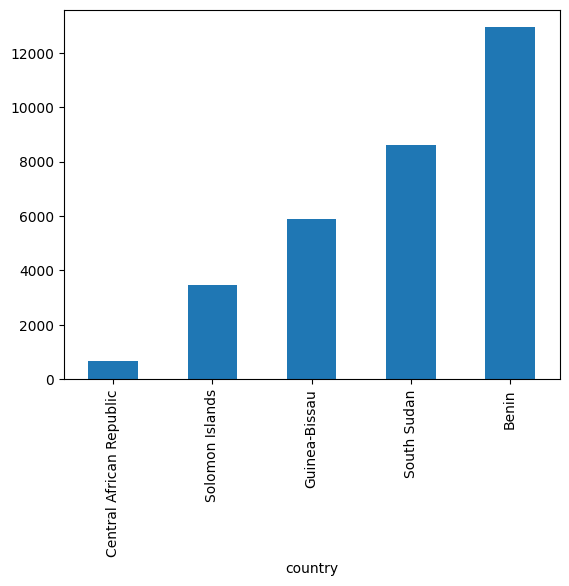

In [24]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

# <center> 5. Графические возможности библиотеки Matplotlib


#### <center> Немного о библиотеке

Matplotlib — это библиотека Python, обладающая большим количеством возможностей для визуализации и настройки отображения графиков и диаграмм.

Для установки библиотеки введите в командную строку (или командную строку Anaconda) следующее:

pip install matplotlib
→ На самом деле мы с вами уже использовали Matplotlib — встроенная визуализация в Pandas полностью основана на данной библиотеке. Однако визуализация в Matplotlib не  
ограничивается только DataFrame: c помощью Matplotlib можно визуализировать любые последовательности (списки, словари, NumPy-массивы).

→ К тому же инструментарий библиотеки поможет вам расширить ваши возможности визуализации, управляя параметрами настройки графиков вручную.

За визуализацию графиков в Matplotlib отвечает модуль pyplot. Традиционно он импортируется под псевдонимом plt. Для более корректного отображения графиков в ноутбуках  
используется команда %matplotlib inline.

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

Примечание. Если вы используете тёмную тему в VS Code, то для корректного отображения графиков на тёмном фоне выполните следующую команду по установке стиля отображения:

In [26]:
plt.style.use('default')

### <center> Основные объекты matplotlib

Библиотека Matplotlib позволяет работать в нескольких режимах. Самый распространённый и мощный по функционалу — объектно-ориентированный режим. Он основан на работе с объектами фигур  
(figure, их ещё называют канвасами или холстами) и координатных плоскостей (axes, или системы координат). 

На рисунке ниже представлена визуализация основных компонентов графика в Matplotlib:

<img src="data/dst3-u1-md13_5_1.png" widt=1000>

Процесс работы над графиком максимально прозрачен: сначала создаётся объект фигуры (fig) , содержащий необходимую информацию и настройки, например размер в дюймах (figsize, восемь дюймов в ширину, четыре — в высоту). К этому объекту с помощью метода add_axes() добавляется координатная плоскость, а на ней располагаются графические объекты. Для создания координатной плоскости необходимо указать её расположение на фигуре в виде списка из координат. В нашем случае она начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает всё отведённое место в области (100%, ширина и высота равны 1).

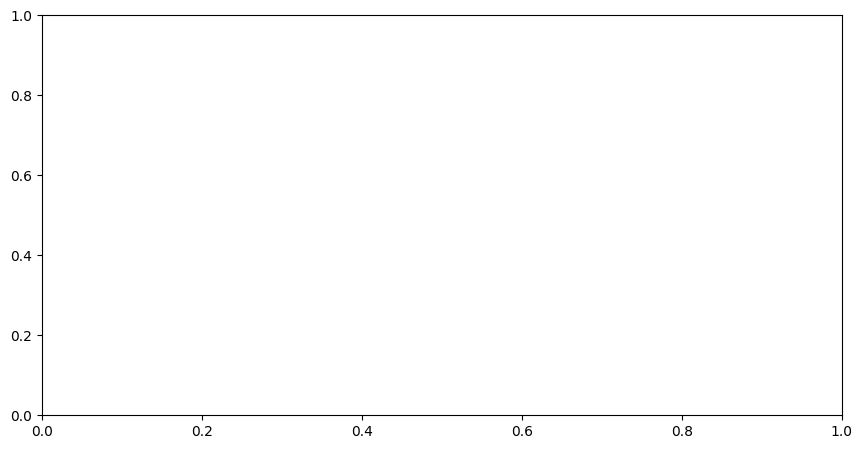

In [27]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

Теперь на созданной системе координат мы можем построить график. 

Утверждается, что коллективная вакцинация позволяет минимизировать риск заражения коронавирусной инфекцией (но только после второго компонента). Давайте проверим это на примере США: построим диаграмму рассеяния, которая покажет зависимость числа ежедневно обнаруживаемых случаев заражения (daily_confirmed) от общего количества привитых вторым компонентом вакцины (people_fully_vaccinated) в США.

У объекта координатной плоскости axes вызовем метод scatter().

#### <center> Основные параметры метода scatter()

* x, y — последовательности, которые будут отложены по осям абсцисс и ординат;
* s — размер маркеров;
* marker — вид маркеров ('o' — точки, '^' — треугольники);
* c — цвет маркеров.

На диаграмме рассеяния по оси абсцисс откладываем суммарное число поставленных вакцин, а по оси ординат — ежедневный прирост заболевших:

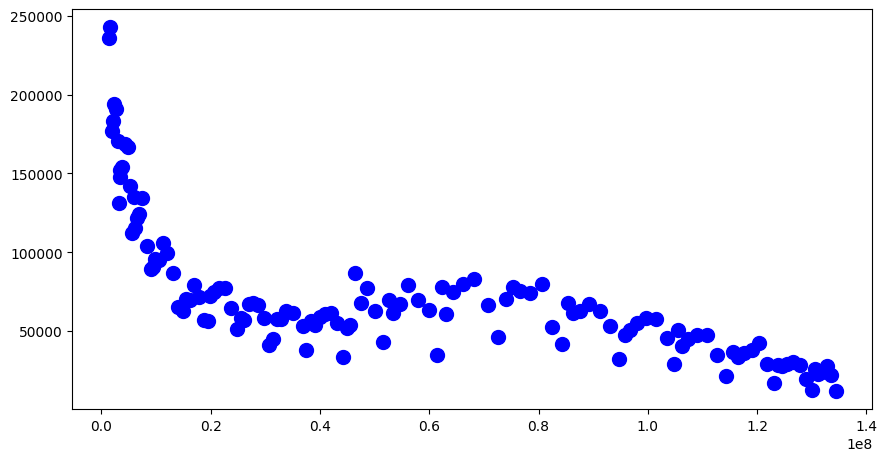

In [28]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='o',
    c = 'blue'
);

Из диаграммы видно, что, в основном, с ростом числа привитых вторым компонентом людей заболеваемость падает, замедляясь на уровне около 50 тысяч заболевших в день, и продолжает снижение дальше.

Построим круговую диаграмму, чтобы отобразить ТОП-10 комбинаций вакцин в мире.

Примечание. Обратите внимание, что под «распространённостью» вакцины здесь подразумевается не количество введённых доз (таких данных у нас в таблице нет), а количество стран, в которых она используется. При этом подсчёт ведётся не по каждой отдельной вакцине, а по их комбинациям, и одна и та же вакцина учитывается несколько раз в сочетаниях с другими.

Для построения круговых диаграмм в Matplotlib используется метод pie().

#### <center> Основные параметры метода pie()

* x — значения, по которым будет строиться круговая диаграмма;
* labels — метки, соответствующие значениям;
* autopct — формат отображения долей на диаграмме (например, '%.1f%%' означает, что округление будет производиться до первого знака после запятой и при выводе будет указан знак "%"; открывающий и закрывающий проценты означают форматирование, а внутренний — вывод знака "%");
* explode — последовательность, которая определяет долю смещения сектора от центра для каждого значения из x.

ТОП-10 комбинаций вакцин (vaccines) по распространённости мы находим с помощью метода value_counts(). Круговую диаграмму строим на полученных значениях, метки для каждого значения — индексы промежуточной таблицы. Будем отображать доли в процентах и округлять их до одного знака после запятой. Самую распространённую вакцину сместим на 10 % от центра:

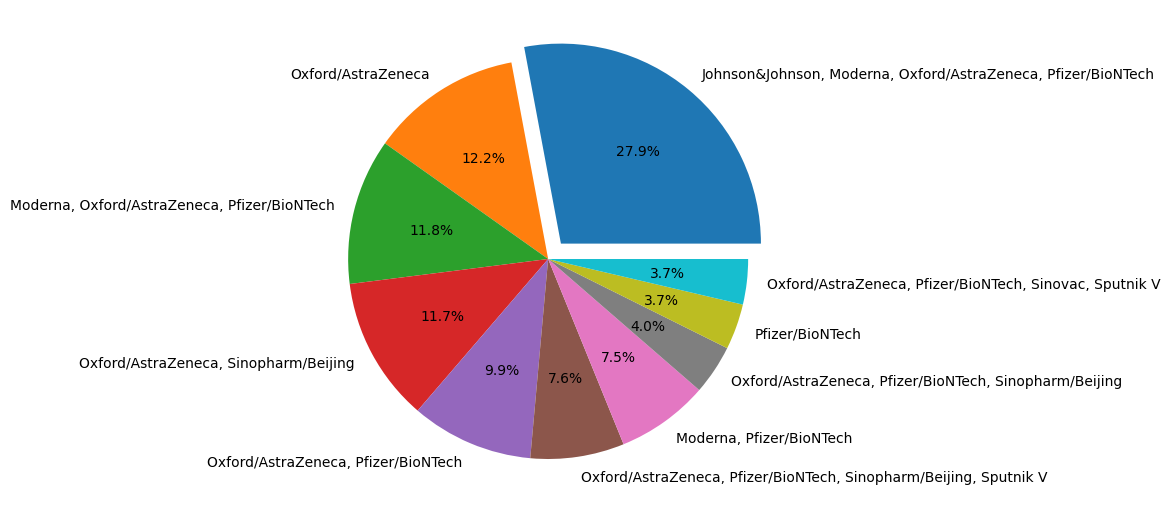

In [29]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

Самой распространённой комбинацией вакцин является комбинация: Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech. Причём можно заметить, что в большинстве популярных комбинаций присутствует вакцина Oxford/AstraZeneca.

Обратите внимание, что диаграмма показывает соотношение только для десяти популярных комбинаций вакцин, а не для всех вакцин в совокупности, что является не совсем корректным для круговой диаграммы, так как она должна отображать единое целое.

К тому же наша круговая диаграмма считает количество использований каждой комбинации в таблице, а не количество стран, в которых используется эта комбинация, что также является некорректным.

→ Более правильным вариантом в данном случае было бы выделить каждую вакцину в отдельности и посчитать, в скольких странах она используется.

Однако для этого нам необходимо будет совершить несколько довольно сложных преобразований:

1. Для начала нам необходимо избавиться от пропусков в столбце с вакцинами. Сделаем это с помощью метода dropna(), который удаляет строки, содержащие пропуски в столбце, указанном в параметре subset(). Данный метод мы будем изучать в следующем модуле, посвящённом очистке данных — пока что не вам не стоит заострять на нём внимание.  
2. Полученные данные необходимо сгруппировать по странам (country) и определить последнюю зафиксированную комбинации вакцин в столбце vaccines.  
В результате такого преобразования мы получаем Series, значениями которого являются комбинации вакцин, которые использовались в странах в последний день рассматриваемого периода.  
3. Преобразуем данные с помощью метода apply(): применим к столбцу lambda-функцию, в которой будем удалять из строки с комбинациями вакцин пробелы и разделять комбинацию на отдельные составляющие по запятым.  
В результате в каждой строке столбца получим список с отдельными вакцинами, которые используются в стране.  
4. Создадим словарь vaccines_dict={}, ключами которого будут являться уникальные вакцины, а значениями — количество стран, в которых они используются. Изначально словарь пустой.  
5. Заполнение словаря реализуем «в лоб» — используя циклы. Во внешнем цикле будем проходиться по всем элементам Series combination_last. На каждой итерации цикла в переменной цикла vaccines_list будет находиться список вакцин, которые используются в стране.  
Во внутреннем цикле будем проходиться по элементам этого списка, вакцинам. Переменную внутреннего цикла назовём vaccine.  
В теле внутреннего цикла проверяем условие, что текущей вакцины ещё нет среди ключей словаря vaccones_dict. Если это условие выполняется, добавляем вакцину в словарь со значением 1. В противном случае увеличиваем текущее количество стран, в которых используется данная вакцина.  
6. В результате работы получаем словарь, который преобразуем в объект Series. Далее выделим семь наиболее популярных вакцин, а остальные обозначим как 'other'. Для этого сортируем Series по убыванию. Вычислим суммарное количество стран, в которых используются вакцины, не попавшие в наш ТОП-7, результат запишем в Series по индексу 'other'.  
Далее выделим восемь наибольших значений в полученной Series — для них и будем строить круговую диаграмму.  
7. Строим круговую диаграмму.

Полный код:

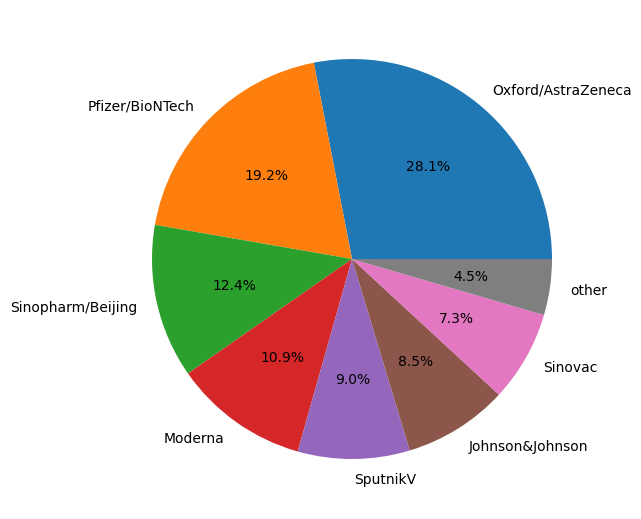

In [30]:
#избавляемся от пропусков в столбце с вакцинами
combination_not_nan = covid_df.dropna(subset=['vaccines'])
#группируем по странам и выбираем последнюю комбинацию вакцин в стране
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last() 
#заменяем пробелы в строках и делим комбинации на отдельные вакцины по запятой
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(',')) 
#создаём пустой словарь, ключами которого будут вакцины, а значениями — количество стран
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество
#преобразуем словарь в Series
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
#выделяем ТОП-7 вакцин и добавляем категорию 'other'
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]
#строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
);

## <center> Добавление информативности в графики

Вы, наверное, заметили, что до этого мы не подписывали графики. График не имеет смысла, если без лишних слов непонятно, что на нём изображено. Управлять информативностью графика можно с помощью методов координатной плоскости axes. Перечислим основные из них (не пугайтесь, запоминать их не обязательно — вы всегда сможете подсмотреть их в документации):

* axes.set_title() — заголовок диаграммы, а также его настройки (например, параметр fontsize отвечает за размер шрифта);
* axes.set_xlabel() — название оси абсцисс;
* axes.set_ylabel() — название оси ординат;
* axes.set_xticks() — установка отметок на оси абсцисс;
* axes.set_yticks() — установка отметок на оси ординат;
* axes.xaxis.set_tick_params() — управление параметрами отметок на оси абсцисс (например, параметр rotation отвечает за поворот отметок в градусах);
* axes.yaxis.set_tick_params() — управление параметрами отметок на оси ординат;
* axes.legend() — отображение легенды;
* axes.grid() — установка сетки.

Например, изобразим на одном графике, как росла общая заболеваемость (confirmed), число зафиксированных смертей (deaths), выздоровевших пациентов (recovered) и активных случаев (active) в Китае.

Для построения линейных графиков в Matplotlib используется метод plot() (не путайте с методом plot() в Pandas!). При вызове метода без параметров по оси ординат откладываются значения столбца таблицы, по оси абсцисс — индексы (в нашем случае это будут даты). 

Дополнительно в параметрах метода указываем параметр label — название графика, которое будет отображаться на легенде, а также lw — ширину линии графика. Добавим к графику заголовок, названия осей, установим метки по оси y с частотой в 10 000, повернём метки по оси x на 30 градусов, а также добавим легенду (метки для легенды выставляются в параметре label метода plot()):

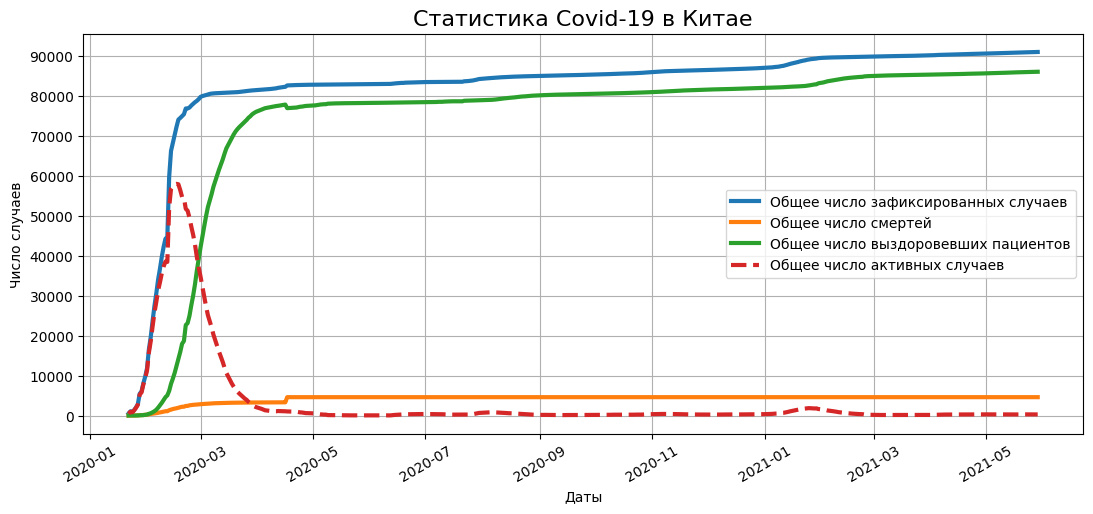

In [31]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

На графике наблюдается резкий рост заболеваемости на начальном периоде до середины февраля 2020 года, после чего видно резкое падение числа активных случаев (примерно в этот период власти Китая ввели тотальный локдаун и прекратили транспортное сообщение со всем миром). Далее число активных случаев только падает, а темп прироста числа заболевших снижается. При этом общее число смертей в Китае остаётся практически на одном уровне (около 5 тысяч), уже начиная с мая 2020 года (новые пациенты умирают крайне редко).

Стоит обратить внимание на выделенные чёрным маркером сдвиги в графиках. Они являются свидетельством противоречия в данных: общее число выздоровевших пациентов почему-то резко упало, а число умерших возросло. Почему так произошло? Произошёл пересчёт числа заболевших? Данные были утеряны или искажены? Если вы в своей практике столкнётесь с такими же противоречиями, вам необходимо будет обратиться к первоисточнику, чтобы выяснить причину.

## <center> Использование нескольких систем координат

При использовании библиотеки Matplotlib вовсе не обязательно ограничиваться одной системой координат.

→ Вы можете размещать несколько систем координат на одной фигуре, что позволит нам отображать вспомогательную информацию на основном графике.

Для добавления второй системы координат необходимо повторно применить к объекту fig метод add_axes, указав новое имя для второй системы координат.

Например, отобразим ТОП-5 стран по общему числу привитых вторым компонентом людей (people_fully_vaccinated), а также ТОП-5 стран по числу полностью привитых на 100 человек населения (people_fully_vaccinated_per_hundred).

Для этого построим столбчатые диаграммы с помощью метода bar().

#### <center> Основные параметры метода bar()

* x — названия категорий, которые будут располагаться по оси абсцисс;
* height — высота столбцов диаграммы, массив из показателей для визуализации (например, среднее, максимальное значение и т. д.);
* width — ширина столбцов диаграммы;
* color — цвет.

Группируем таблицу по странам, находим последний по дате зафиксированный показатель с помощью метода last() и выбираем ТОП-5 стран с использованием метода nlargest().

При отображении графиков создаём две координатные плоскости main_axes и insert_axes, на каждой из них отдельно строим столбчатые диаграммы.

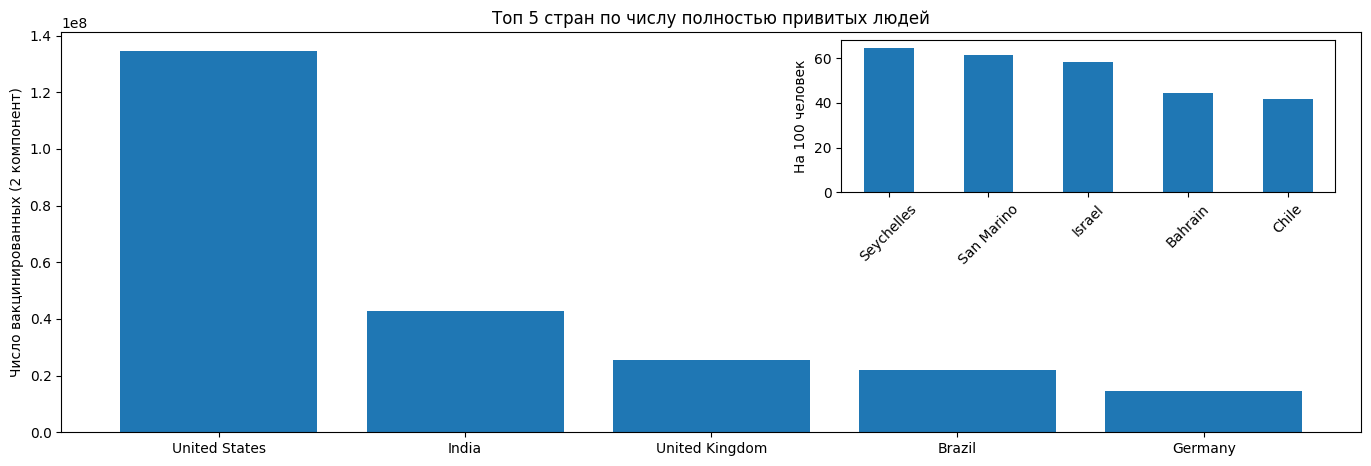

In [32]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

Примечание. Первые два числовых параметра, указанные при создании систем координат, — это отступ снизу и слева, следующие два — ширина и высота относительно ширины и высоты всего пространства (в долях единицы) для построения графика.

Нетрудно заметить, что два представленных рейтинга отличаются: лидером по числу полностью привитых является США, а вот по числу вакцин на 100 человек населения — Сейшелы. В первый список попали страны с большим количеством населения, которое они активно прививают. Во второй список попали маленькие страны, которые проще всего обеспечить вакциной.

В наш ТОП не попали страны, которые пользуются однокомпонентной вакциной, например Китай.

## <center> Subplots

Создание дополнительных систем координат с помощью метода add_axes() полезно, однако используется не так часто.

В большинстве случаев для отображения нескольких систем координат используется функция subplots(). Она создаёт целую таблицу из систем координат на одной фигуре. Функция возвращает новую фигуру, а также список координатных плоскостей.

#### <center> Основные параметры метода subplots()

* nrows — число строк;
* ncols — число столбцов;
* figsize — общий размер фигуры в дюймах (ширина и высота).

Например, следующий код создаст шесть координатных плоскостей, сведённых в таблицу размера 2x3:

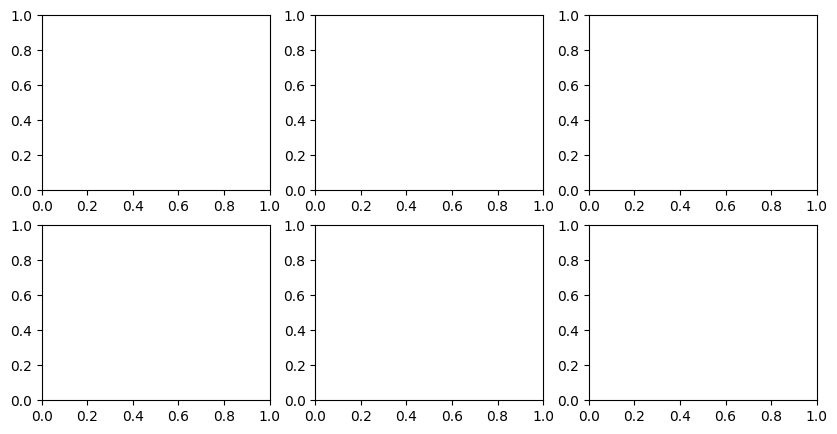

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

Теперь, обладая знаниями о методе subplots(), построим три графика:

1. Столбчатую диаграмму, которая покажет динамику ежедневной вакцинации в России.  
2. Линейный график изменения ежедневной заболеваемости в стране.  
3. Гистограмму ежедневной заболеваемости в стране.  
За построение гистограмм в библиотеке Matplotlib отвечает метод hist().

#### <center> Основные параметры метода hist()

* x — массив чисел, для которого строится гистограмма;
* bins — число столбцов (корзин);
* orientation — ориентация гистограммы (по умолчанию 'vertical');
* color — цвет.

Фильтруем таблицу covid_df по признаку страны и выбираем записи только для России.

Для того чтобы отобразить график в соответствующей координатной плоскости, нужно обратиться к списку axes по индексу (от 0 до 2). Дальнейшая настройка графиков вам уже известна.

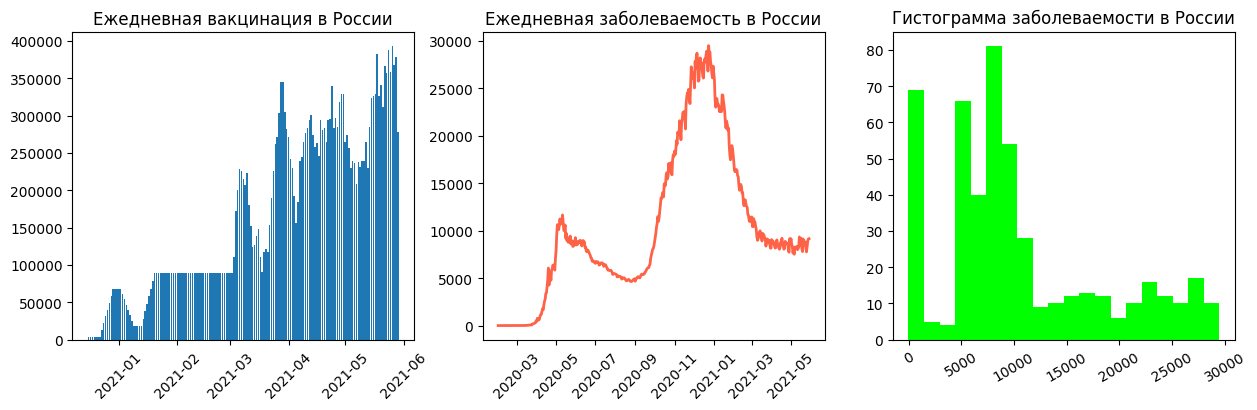

In [34]:
russia_data = covid_df[covid_df["country"] == "Russia"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data["date"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)

* На первом графике можно наблюдать колеблющийся рост числа ежедневно вакцинированных людей. Особенно в глаза бросается «пенёк» в период с конца января до начала марта 2021 года. Это период, когда данные о процессе вакцинации людей не обновлялись.

* На втором графике мы видим две волны коронавируса в России. Первая — в середине марта 2020 года, которая достигла максимума в 13 тысяч заболевших за сутки. Вторая волна, судя по графику, началась в октябре 2020 года и достигла своего пика почти в 30 тысяч заболевших за сутки в конце декабря этого же года (точные данные: 24 декабря было зафиксировано рекордное число подтверждённых случаев: 29935).

Далее с ростом показателей вакцинации и введением новых карантинных мер заболеваемость снова постепенно снижается.

* На третьем графике можно увидеть, что большая часть наблюдений ежедневной заболеваемости находится в интервале от 5 до до 10 тысяч человек в день. Ещё один пик гистограммы находится около 0 — это случаи, зафиксированные на начальных этапах эпидемии (в Россию Covid-19 пришёл позже, чем во многие другие страны).

Выберите вариант кода, который позволит построить приведённый ниже график (посмотрите в документации параметры объекта figure, которые позволяют раскрашивать части фигуры).

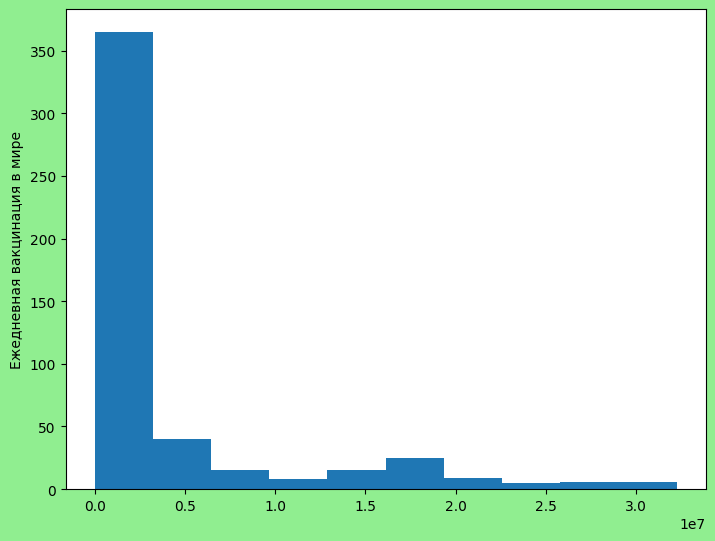

In [35]:
fig = plt.figure(facecolor='lightgreen')
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(covid_df.groupby('date')['daily_vaccinations'].sum())
axes.set_ylabel('Ежедневная вакцинация в мире');

Какое название лучше всего подойдёт графику, который строит код ниже?

<BarContainer object of 5 artists>

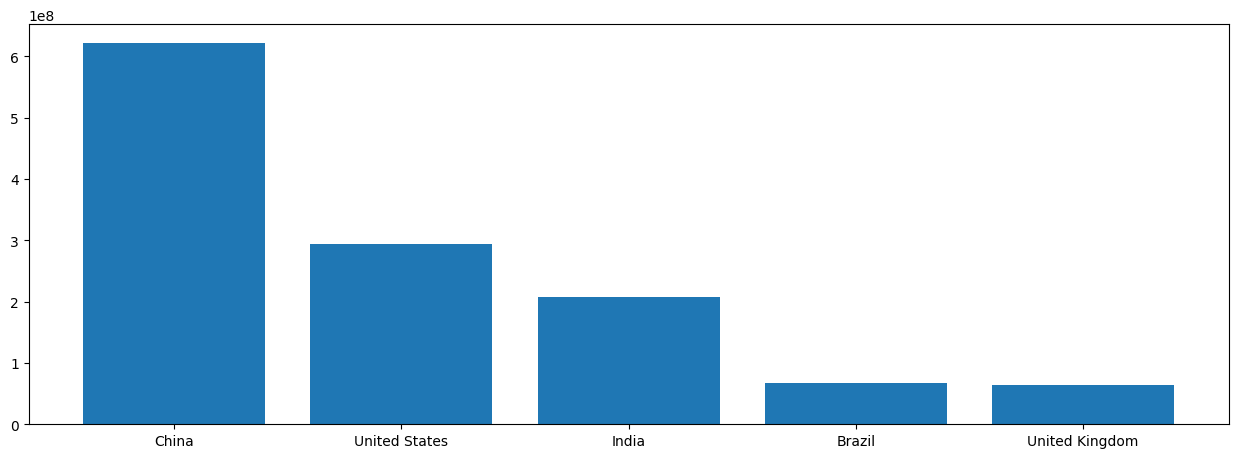

In [36]:
v = covid_df.groupby(['country'])['total_vaccinations'].last().nlargest(5)
fig = plt.figure(figsize=(12, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x=v.index,height=v)

# <center>  6. Графические возможности библиотеки Seaborn